In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn

Accuracy: 0.8458937198067633
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1021
           1       0.83      0.87      0.85      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



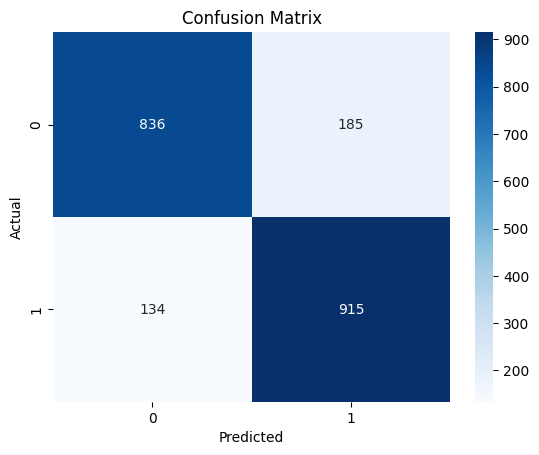

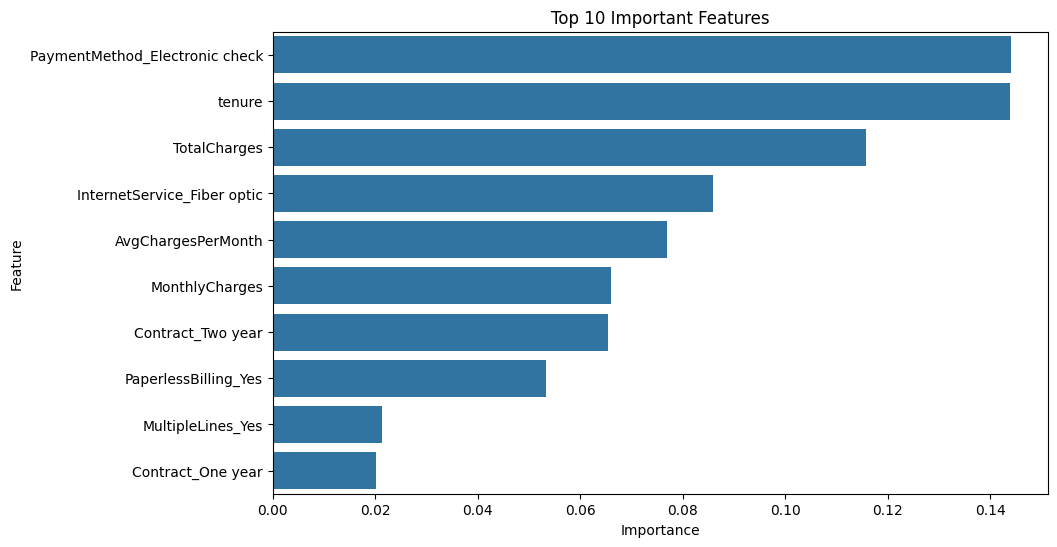

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.drop(columns=['customerID'], inplace=True)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

df['AvgChargesPerMonth'] = df['TotalCharges'] / (df['tenure'] + 1)  # Avoid division by zero

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df = pd.get_dummies(df, drop_first=True)

X = df.drop('Churn', axis=1)
y = df['Churn']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'class_weight': ['balanced', None]
}
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=10,  # Limits the number of iterations
    cv=3,  # Reduce cross-validation folds
    scoring='recall',
    n_jobs=-1,
    random_state=42
)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance[:10])
plt.title('Top 10 Important Features')
plt.show()
